# A simple computational pipeline

In [16]:
import urllib.request
import matplotlib.pyplot as plt
import PIL.Image

In [1]:
import datajoint as dj

schema = dj.Schema('gallery')

[2024-11-19 23:45:50,108][INFO]: Connecting root@localhost:3306
[2024-11-19 23:45:50,181][INFO]: Connected root@localhost:3306


In [10]:
@schema
class ImageSource(dj.Lookup):
    definition = """
        image_id :  int unsigned
        ---
        image_description : varchar(60)
        url  : varchar(255)
        """
    
    contents = (
        (1, "rat cortex culture", r"https://upload.wikimedia.org/wikipedia/commons/7/75/Rat_primary_cortical_neuron_culture%2C_deconvolved_z-stack_overlay_%2830614937102%29.jpg"),
        (2, "geode", r"https://m.media-amazon.com/images/I/616UJiHwGZL.__AC_SX300_SY300_QL70_FMwebp_.jpg"),
        )

In [11]:
ImageSource()

image_id,image_description,url
1,rat cortex culture,https://upload.wikimedia.org/wikipedia/commons/7/75/Rat_primary_cortical_neuron_culture%2C_deconvolved_z-stack_overlay_%2830614937102%29.jpg
2,geode,https://m.media-amazon.com/images/I/616UJiHwGZL.__AC_SX300_SY300_QL70_FMwebp_.jpg


In [19]:
image = PIL.Image.open("temp.jpg")


In [22]:
import numpy as np
np.array(image)

array([[[69, 40, 24],
        [66, 39, 18],
        [64, 40, 16],
        ...,
        [ 7,  1,  1],
        [ 8,  2,  2],
        [ 9,  3,  3]],

       [[68, 34, 32],
        [63, 34, 26],
        [61, 35, 20],
        ...,
        [ 7,  1,  1],
        [ 7,  1,  1],
        [ 7,  1,  1]],

       [[67, 29, 44],
        [61, 30, 36],
        [55, 31, 27],
        ...,
        [ 7,  1,  1],
        [ 6,  0,  0],
        [ 6,  0,  0]],

       ...,

       [[ 8,  3,  0],
        [ 6,  2,  0],
        [ 5,  1,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  4,  1],
        [ 7,  3,  0],
        [ 5,  1,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  4,  1],
        [ 7,  3,  0],
        [ 6,  2,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [9]:
ImageSource()

image_id,image_description,url


In [23]:
@schema
class Image(dj.Imported):
    definition = """
    -> ImageSource
    ---
    image : longblob
    """

    def make(self, key):
        url = (ImageSource & key).fetch1('url')
        urllib.request.urlretrieve(url, 'temp.jpg')
        image = PIL.Image.open("temp.jpg")
        self.insert1(dict(key, image=np.array(image)))
        


In [24]:
Image.populate(display_progress=True)

Image:   0%|          | 0/2 [00:00<?, ?it/s]

Image: 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]


{'success_count': 2, 'error_list': []}

In [26]:
Image * ImageSource

image_id,image,image_description,url
1,=BLOB=,rat cortex culture,https://upload.wikimedia.org/wikipedia/commons/7/75/Rat_primary_cortical_neuron_culture%2C_deconvolved_z-stack_overlay_%2830614937102%29.jpg
2,=BLOB=,geode,https://m.media-amazon.com/images/I/616UJiHwGZL.__AC_SX300_SY300_QL70_FMwebp_.jpg


(np.float64(-0.5), np.float64(269.5), np.float64(299.5), np.float64(-0.5))

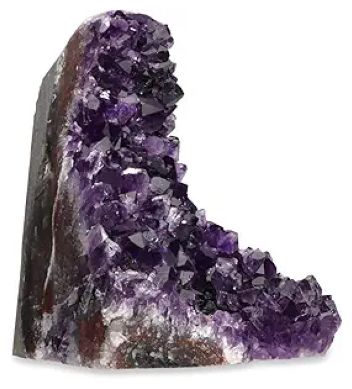

In [29]:
plt.imshow((Image & 'image_id=2').fetch1('image'))
plt.axis(False)

# GUIs and Dashboards

Several frameworks are available to build applications around database systems.
Popular frameworks for web applications in Python are Flask, Streamlit, and Plotly Dash.

We will use Plotly Dash in this course.

Cover this quick tutorial: https://dash.plotly.com/tutorial and the explore the full features of this rich framework. 

You can edit and lauch your app [directly from a jupyter notebook](https://dash.plotly.com/jupyter-notebooks/).

In [30]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data, Graph, and Controls'),
    html.Hr(),
    dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'], value='lifeExp', id='controls-and-radio-item'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=6),
    dcc.Graph(figure={}, id='controls-and-graph')
]

# Add controls to build the interaction
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

In [31]:
# Run the app
app.run(jupyter_mode="external")



Dash app running on http://127.0.0.1:8050/
